# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import cv2
import PIL
from PIL import Image

In [ ]:
#implement elbow method from scratch
def elbow(X, method='k-means++'):
    k = np.arange(2,11)
    wcss = list()
    for i in k:
        kmeans = KMeans(n_clusters=i, init=method, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        
    avg_dist = [i/X.shape[0] for i in wcss]
    plt.plot(k, avg_dist)
    plt.show()
    
    # finding the elbow
    second_diff = np.diff(wcss, 2)
    idx = np.argmax(second_diff) + 1
    elbow = k[idx]
    return elbow

In [ ]:
#implement silhouette method from scratch
def silhouette(X, method='k-means++'):
    k = np.arange(2,21)
    scores = list()
    for i in k:
        kmeans = KMeans(n_clusters=i, init=method, random_state=42)
        kmeans.fit(X)
        l = kmeans.labels_
        score = silhouette_score(X, l)
        scores.append(score)
        
    plt.plot(k, scores)
    plt.show()
    
    # finding the elbow
    idx = np.argmax(scores)
    k_opt = k[idx]
    return k_opt

In [ ]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# you can performs your training on train/test dataset alone if there are computational issues
X = testX.reshape(testX.shape[0] , -1)
y = np.array(testy)
X.shape, y.shape

((10000, 784), (10000,))

In [ ]:
X = StandardScaler().fit_transform(X)

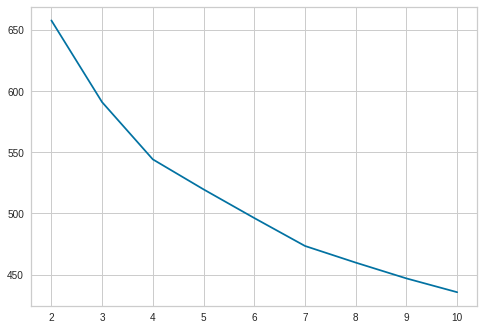

4

In [ ]:
clusters_opt = elbow(X)
clusters_opt

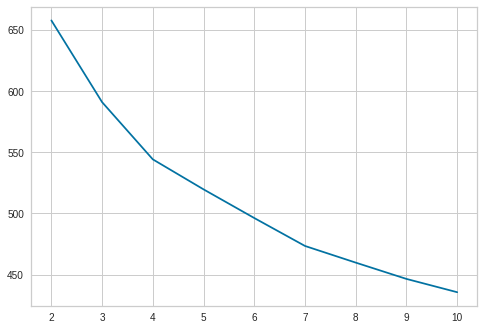

4

In [ ]:
clusters_opt = elbow(X, 'random')
clusters_opt

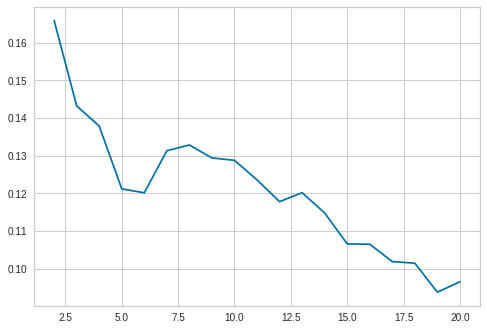

2

In [ ]:
clusters_opt = silhouette(X)
clusters_opt

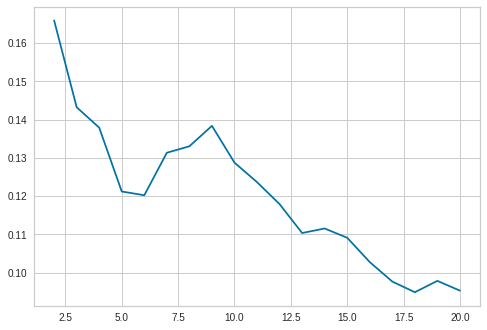

2

In [ ]:
clusters_opt = silhouette(X, 'random')
clusters_opt

In [ ]:
X_new = PCA(n_components=2).fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_new)

KMeans(n_clusters=4)

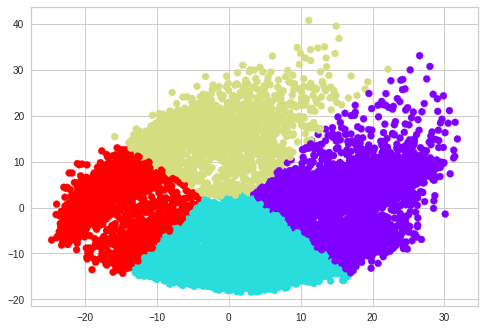

In [ ]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.show()

## Part2: Hierarchical clustering

In [ ]:
#visualize a dendogram

def dendogram(X):
    # Compute the linkage matrix
    Z = sch.linkage(X, 'ward')
    sch.dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

  

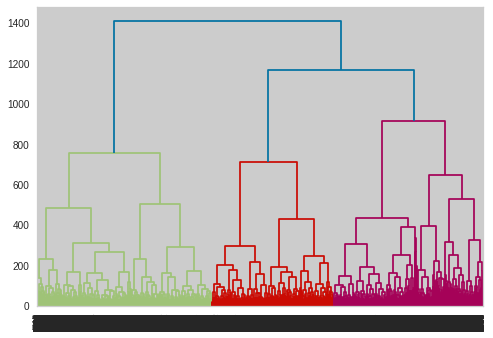

In [ ]:
dendogram(X)

In [ ]:
# implement hierarchical clustering ( you can use scikit module)
def hierarchical_clustering(X, clusters=4):
  Z = sch.linkage(X, 'ward')
  model = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
  model.fit(X)
  a = X[:, 0]
  b = X[:, 1]
  l = model.labels_
  plt.scatter(a,b,c=l,cmap='rainbow')
  plt.show()


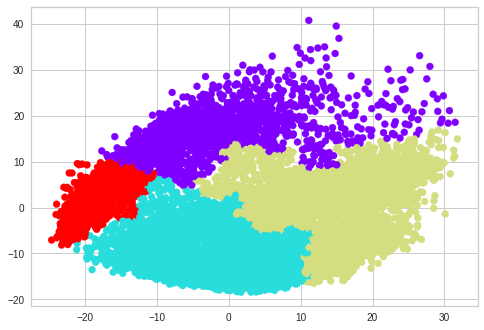

In [ ]:
hierarchical_clustering(X_new)

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
</br>
</br>
</br>





In [ ]:
#visualisation of clusters using single linkage and complete linkage

def visualise(X, method="single", clusters = 4):
  Z = sch.linkage(X, method)
  model = AgglomerativeClustering(n_clusters = clusters, linkage=method)
  model.fit(X)
  a = X[:, 0]
  b = X[:, 1]
  l = model.labels_
  plt.scatter(a,b,c=l,cmap='rainbow')
  plt.show()



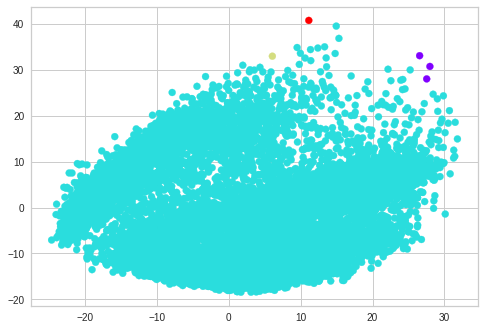

In [ ]:
# single
visualise(X_new)

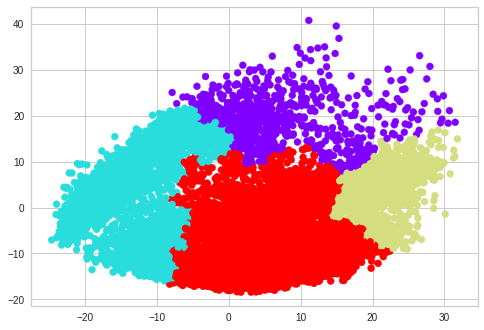

In [ ]:
# complete
visualise(X_new, "complete")

**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
</br>
</br>
</br>

## Part3: Image Compression

In [2]:
# Boiler plate code
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

In [3]:
X.shape

(406400, 3)

In [15]:
class kmeans_img():
    def __init__(self, img, img_size, new_img, n_init=10):
        self.img = img
        self.new_img = new_img
        self.img_size = img_size
        self.k = [10,20,50]
        self.clusters = 10 # default
        self.n_init = n_init
        
    def show_org_img(self):
        self.fig, self.axes = plt.subplots(1, 4, figsize=(16, 4))
        self.axes[0].imshow(self.img)
        self.axes[0].set_title('Original Image')
        
    def k_img(self, i):
        self.clusters = i
        kmeans = KMeans(n_clusters=self.clusters, n_init=self.n_init).fit(self.new_img)
        new_cols = kmeans.cluster_centers_[kmeans.labels_]
        return Image.fromarray(kmeans.cluster_centers_[kmeans.labels_].reshape(self.img_size[0], self.img_size[1], self.img_size[2]).astype(np.uint8))
        
    def expt_diff_k(self):
        self.show_org_img()
        for i in self.k:
            im = self.k_img(i)
            idx = self.k.index(i) + 1
            self.axes[idx].imshow(im)
            self.axes[idx].set_title(f"K = {i}")
            
        plt.tight_layout()
        plt.show()
        
    def data_redn(self):
        for i in self.k:
            im = self.k_img(i)
            original_size = 3 * self.img_size[0] * self.img_size[1] * 8
            new_size = i * 24 + self.img_size[0] * self.img_size[1] * np.ceil(np.log2(i))
            numer = new_size - original_size
            denom = original_size
            data_red = numer/denom * 100
            
            print(f"\nData reduction for K value {i} is {data_red}\n")
            
    def unique_colors(self):
        colors = np.unique(self.new_img, axis=0)
        ans = colors.shape[0]
        print(f"\nNumber of unique colors in the image is {ans}\n")

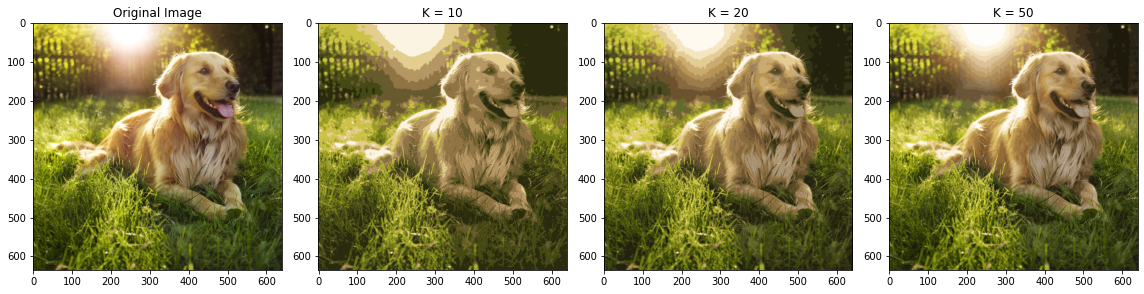


Data reduction for K value 10 is -83.33087270341207


Data reduction for K value 20 is -79.16174540682415


Data reduction for K value 50 is -74.9876968503937


Number of unique colors in the image is 132958



In [16]:
idk = kmeans_img(img, img_size, X)
idk.expt_diff_k()
idk.data_redn()
idk.unique_colors()